# Assessment 2 - Data Analytics Notebook

####  The following data I use for analysis are real-time data, and the data may change during the assessment check........................

I choose the 1st scenario:
Your company manufactures clothing products with prints drawing on popular themes. The product development manager is considering  adding a new winter jacket with images related to movies that are popular with youth aged 16-25. They need to know what  the hot movies are at the moment, the suggested images based on this information, and  where and when in Australia an early test launch of the product should be conducted.

Hello everyone, I am the CEO of a clothing design company. Since most of teenagers nowadays are very passionate about fashion trend, my company's clothing products are printed with popular themes, and it is very easy to make money, I think.

Now, there are a lot of popular movies being released, so the product development manager of my company and I are considering designing a new winter jacket with images related to movies that are popular with youth aged 16-25.

So the first thing I need to do now is to know what the hot movies are at the moment. I plan to use the popular film review website IMDb (https://www.imdb.com/). The current popular movies could be found from this website.

## Scraping hot movies from IMDb

In [1]:
# Install BeautifulSoup's library into Jupyter Notebook
!pip install bs4
# Install a parsing library 
!pip install html5lib

The directory '/jupyteruser/renny97/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/renny97/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
The directory '/jupyteruser/renny97/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/home/renny97/.cache/pip' or its parent directory is not owned by the current use

This part is for declaring some functions and importing some other required libraries.

In [2]:
# Import required libraries
from bs4 import BeautifulSoup
import html5lib

import urllib.request
import json
import requests

# For regurlar expressions
import re

# Image display
from IPython.display import Image
from IPython.core.display import HTML 

# General function that receives a url, and returns an html page ready to be parsed
def get_HTML(url):
    response = urllib.request.urlopen(url)      # connect to server
    html = response.read()                      # if access is allowed
    return html                                 # return html document of the given url

Scrape 'Most Popular Movies' from IMDb(https://www.imdb.com/chart/moviemeter).

Details:

 * A 'h1' element contains the title of the target 'table'.
 * A 'table' element proceeds the 'h1' element.
 * There are 'td' elements inside the 'table' element.
 * Each 'td' element has an attribute of 'class' with the value 'titleColumn'. In this element, there is an 'a' element with the names of movies and there is a 'div' element with the rankings of movies
 * Each 'td' element has an attribute of 'class' with the value 'ratingColumn imdbRating'.In this element, there is a 'strong' element with the ratings of movies.
 * Each 'td' element has an attribute of 'class' with the value 'posterColumn'.In this element, there is an 'img' element with the images of movies.
 
Then I can scrape the names, ratings, image links and rankings of movies.

In [3]:
top_popular_movies_names = []
top_popular_movies_ratings = []
top_popular_movies_images = []
top_popular_movies_rankings = []

Movies_IMDb_HTML = get_HTML('https://www.imdb.com/chart/moviemeter')
soup = BeautifulSoup(Movies_IMDb_HTML, "html.parser")
h1_element = soup.find(text="Most Popular Movies")
table_element = h1_element.findNext("table")

for td_element in table_element.findAll("td",attrs={'class':'titleColumn'}):
    a_element = td_element.find("a")  # Find names
    if a_element != None:
        top_popular_movies_names.append(a_element.text)
    
    div_element = td_element.find("div",attrs={'class':'velocity'})  # Find the rankings
    if div_element != None:
        top_popular_movies_rankings.append(div_element.text)

for td_element in table_element.findAll("td",attrs={'class':'ratingColumn imdbRating'}): # Find the ratings
    strong_element = td_element.find("strong")
    if strong_element != None:
        top_popular_movies_ratings.append(strong_element.text)
    if strong_element == None:  # Return "None" when the movie has no rating
        top_popular_movies_ratings.append("None")

img_list = []   # Define img_list
for td_element in table_element.findAll("td",attrs={'class':'posterColumn'}):
    img_element = td_element.find("img")  # Find the url of images
    if img_element != None:
        top_popular_movies_images.append(img_element.text)
        img_list.append(img_element['src'])

for i in range(0,len(top_popular_movies_names)):
    print("Name:", top_popular_movies_names[i])
    print("Rating:", top_popular_movies_ratings[i])
    print("Image:", img_list[i])
    print("Ranking:", top_popular_movies_rankings[i][:top_popular_movies_rankings[i].index("(")])
    # In the ranking section, need to remove the number that shows the ranking floating up and down.

Name: Avengers: Endgame
Rating: 9.2
Image: https://m.media-amazon.com/images/M/MV5BMTc5MDE2ODcwNV5BMl5BanBnXkFtZTgwMzI2NzQ2NzM@._V1_UY67_CR0,0,45,67_AL_.jpg
Ranking: 1

Name: Hellboy
Rating: 5.4
Image: https://m.media-amazon.com/images/M/MV5BODdkMDQzMzItZDc4YS00OGM4LTkxNTQtNjUzNzU0ZmJkMWY2XkEyXkFqcGdeQXVyMjMxOTE0ODA@._V1_UY67_CR0,0,45,67_AL_.jpg
Ranking: 2

Name: Shazam!
Rating: 7.6
Image: https://m.media-amazon.com/images/M/MV5BYTE0Yjc1NzUtMjFjMC00Y2I3LTg3NGYtNGRlMGJhYThjMTJmXkEyXkFqcGdeQXVyNTI4MzE4MDU@._V1_UY67_CR0,0,45,67_AL_.jpg
Ranking: 3

Name: After
Rating: 5.7
Image: https://m.media-amazon.com/images/M/MV5BOGUwMjk3YzktNDI0Yy00MzFiLWFjNmEtYTA2ODVjMzNhODhjXkEyXkFqcGdeQXVyOTQ1MDI4MzY@._V1_UY67_CR0,0,45,67_AL_.jpg
Ranking: 4

Name: Star Wars: The Rise of Skywalker
Rating: None
Image: https://m.media-amazon.com/images/M/MV5BNDA5YWU1MDItOWZlOS00YTljLThhYTYtMzM4MGI2NjhlMDYwXkEyXkFqcGdeQXVyNjg2NjQwMDQ@._V1_UY67_CR0,0,45,67_AL_.jpg
Ranking: 5

Name: The Silence
Rating: 5.3
Image: https:

### Extraction of some representative images of the movies

The representative pictures are probably the pictures used to make clothes in the future, so it is necessary to print the images of the top three movies.

In [4]:
# Display the image of the first movie.
print(top_popular_movies_names[0])
Image(url = img_list[0])

Avengers: Endgame


In [5]:
print(top_popular_movies_names[1])
Image(url = img_list[1])

Hellboy


In [6]:
print(top_popular_movies_names[2])
Image(url = img_list[2])

Shazam!


### Analysis of the most popular movies from IMDb (textual reviews).

After printing the information of movies, I choose the top three of these movies for discussion, which are Avengers: Endgame, Hellboy and Shazam!. I take 20 comments of each movie of the top three movies for analysis, and I modify the styles of the comments slightly before visualization.

In [7]:
# Import some display software
from IPython.core.display import display, HTML
# Import the Regex library
import re
# Import the plotting library
import matplotlib.pyplot as plt

def sentiment_html_chart(txt):
    print(txt)
    file = open(txt) # Open the file and read it into a variable 'text'
    rawtext = file.read()
    file.close()
    
    reviews = rawtext.split("\n") # Split the document by newlines
    if reviews[-1]=='':
        del reviews[-1] # Remove last empty item 
    
    # Create a function to extract the number value as a positive, neutral or negative label
    def getSentimentLabel(text):
        match = re.search(r"(?<=__label__)[0-9]+",text)
        value = match.group(0)
        if value >= '7' and value <= '9':
            return 'positive'
        elif value >= '4' and value <= '6':
            return 'neutral'
        elif value >= '0' and value <= '3':
            return 'negative'
    
    # Create a function to extract the subject
    def getSubject(text):
        split = re.split(r"(?<=__label__)[0-9]+",text)
        return split[1].strip()
    
    # Setup a review namedtuple
    from collections import namedtuple
    Review = namedtuple('review',['label','subject','text'])
    
    # Create a function to parse a review into a tuple
    def parseReview(text):
        textSplit = text.split(':')
        text = textSplit[1]  
        subject = getSubject(textSplit[0])
        label = getSentimentLabel(textSplit[0])
        return Review(label,subject,text)
    
    # Process all reviews with the parseReview function
    structuredReviews = list(map(parseReview,reviews))
    
    # Create a function to turn the reviews into Html
    def reviewsToHtml(reviewList):
        def pTag(review): # Function that wraps review in tags
            return '<p><span class="'+review.label+'">'+review.subject+"</span>: "+review.text+"</p>"
        paras = map(pTag,reviewList) # Apply the wrapping function to the list
        return HTML(''.join(paras)) # Join the paragraphs together and return as HTML
    
    # Create the HTML by calling the function
    structReviewsHtml = reviewsToHtml(structuredReviews)
    
    # Create the CSS for the positive, neutral or negative labels
    css = HTML("""
    <style>
    .positive {
        color:green;
    }
    .neutral {
        color:grey;
    }
    .negative {
        color:red;
    }
    </style>
    """)
    
    # Display the HTML
    display(css,structReviewsHtml)
    
    posList = list(filter(lambda review: review.label=='positive', structuredReviews))
    neuList = list(filter(lambda review: review.label=='neutral', structuredReviews))
    negList = list(filter(lambda review: review.label=='negative', structuredReviews))
    posCount = len(posList)
    neuCount = len(neuList)
    negCount = len(negList)
    print("\n")
    print(txt)
    print("Number of positive reviews: ",posCount)
    print("Number of neutral reviews: ",neuCount)
    print("Number of negative reviews: ",negCount)
    
    # Setup the data
    y = [posCount,neuCount,negCount]
    x = ['positive','neutral','negative']
    colours = ['green','grey','red']
    # Plot the data
    plt.bar(x,y, color=colours)
    # Lable the chart
    plt.ylabel('Number of reviews')
    plt.xlabel('Sentiment')
    plt.title('Reviews Sentiment Mix')
    plt.show()
    print("\n")

Reviews_Avengers_Endgame.txt




Reviews_Avengers_Endgame.txt
Number of positive reviews:  19
Number of neutral reviews:  1
Number of negative reviews:  0


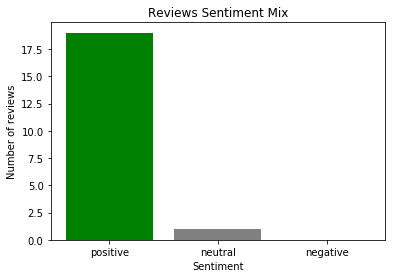

In [8]:
sentiment_html_chart("Reviews_Avengers_Endgame.txt")

Reviews_Hellboy.txt




Reviews_Hellboy.txt
Number of positive reviews:  4
Number of neutral reviews:  7
Number of negative reviews:  9


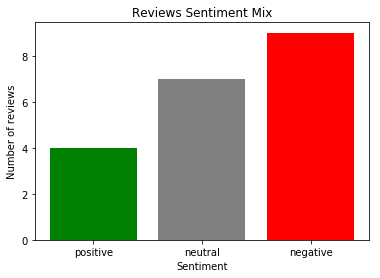

In [10]:
sentiment_html_chart("Reviews_Hellboy.txt")

Reviews_Shazam!.txt




Reviews_Shazam!.txt
Number of positive reviews:  11
Number of neutral reviews:  7
Number of negative reviews:  2


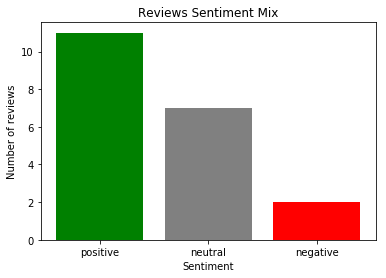

In [11]:
sentiment_html_chart("Reviews_Shazam!.txt")

Avengers: Endgame - It is top one in the "Most Popular Movies" and its rating is also particularly high. So it can be seen that this movie has not only been hot recently, but also very popular with the audience. From the perspective of the audience’s comments, It is almost positive, 19 of the 20 comments are positive.

Hellboy - Although the film is ranked second, its rating is not high. This shows that this movie is only hot temporarily but not really liked by the audience. And most of the comments of this movie are neutral or negative.

Shazam! - This movie is ranked third, but its score is not low. So the overall is very balanced. And from the perspective of the audience’s comments, Shazam! is good, although the film has some negative comments, most of them are positive.

## Use Twitter API

After scraping the names of movies, I need to connect to Twitter API and then extract tweets about the current hot movies to analyze which movie to choose.

In [12]:
# Import required libraries
import tweepy           # To access and consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# Twitter App access keys

# Consume:
CONSUMER_KEY    = 'ye16AUoxZJKuxt6GjXxehP2gS'
CONSUMER_SECRET = 'eBv3ZmfoviS4OfCGLS4oqffNfETvyjY9n5TW0qaXGXcypJLxPe'

# Access:
ACCESS_TOKEN  = '1107510098081906689-41nvMZT866x2lUZxtHFALorSU2abay'
ACCESS_SECRET = 'CJnOlBPzrhKuZ7lFyDsL4iqXkoPH24E18v9wUqXvtgvcF'

# API's setup:
def connectToTwitterAPI():
    """
    Utility function to setup the Twitter's API
    with access keys.
    """
    # Authentication and access using keys
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication
    api = tweepy.API(auth)
    return api

In [15]:
# Call the tweets_count function and connect to Twitter API. Extract Tweets using a search term
def tweets_count(c):
    print(c)
    
    # Create an extractor object
    extractor = connectToTwitterAPI() 
    # Specify search criteria and extract tweets
    tweets = extractor.search(q=c, lang = "en", count=100)
    # Print the total number of extracted tweets
    print("Number of tweets extracted: {}.\n".format(len(tweets)))

tweets_count("#Avengers: Endgame")
tweets_count("#Hellboy")
tweets_count("#Shazam!")

#Avengers: Endgame
Number of tweets extracted: 76.

#Hellboy
Number of tweets extracted: 64.

#Shazam!
Number of tweets extracted: 87.



In [16]:
# Determine whether a tweet is positive, negative or neutral using sentiment analysis
from textblob import TextBlob
import re

# Pre-process and clean the tweet content
def cleanTweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# Analyse sentiment for tweets
def analyseSentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(cleanTweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

Call the tweets_frame function and connect to Twitter API. Create a data frame and store relavant data from each tweet. Display the first 10 tweets of each movie.

In [17]:
def tweets_frame(f):
    print(f)
    
    extractor = connectToTwitterAPI()
    # Specify search criteria
    tweets = extractor.search(q=f, lang = "en", count=100)
    # Create a pandas dataframe
    data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
    
    # Add relavant data from each tweet, including sentiment
    data['len']  = np.array([len(tweet.text) for tweet in tweets]) # Textual content legnth
    data['ID']   = np.array([tweet.id for tweet in tweets])
    data['Date'] = np.array([tweet.created_at for tweet in tweets])
    data['Source'] = np.array([tweet.source for tweet in tweets])
    data['Likes']  = np.array([tweet.favorite_count for tweet in tweets]) # Likes counts
    data['RTs']    = np.array([tweet.retweet_count for tweet in tweets]) # Retweets count
    data['Sentiment'] = np.array([ analyseSentiment(tweet) for tweet in data['Tweets'] ])

    # Display the first 10
    display(data.head(10))
    print("\n")

tweets_frame("#Avengers: Endgame")
tweets_frame("#Hellboy")
tweets_frame("#Shazam!")

#Avengers: Endgame


,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,RT @ejgulep: The women of Marvel by @ejgulep \...,140,1122126926221496320,2019-04-27 13:14:41,Twitter for Android,0,172,0
1,My parents on Avengers Endgame.....\n\n #cheat...,135,1122126835599339520,2019-04-27 13:14:20,Twitter for Android,2,0,0
2,RT @UPROXX: some people just sit and wait in t...,140,1122126818008375296,2019-04-27 13:14:16,Twitter for iPhone,0,2582,0
3,RT @UPROXX: some people just sit and wait in t...,140,1122126725473685504,2019-04-27 13:13:54,Twitter for iPhone,0,2582,0
4,RT @HopeJanetteTX: Avengers endgame spoiler wi...,140,1122126720855883777,2019-04-27 13:13:53,Twitter for iPhone,0,1107,0
5,RT @MovieMantz: It just keeps getting BIGGER!!...,140,1122126710756003841,2019-04-27 13:13:50,Twitter for iPhone,0,120,0
6,RT @UPROXX: some people just sit and wait in t...,140,1122126704233730048,2019-04-27 13:13:49,Twitter for iPhone,0,2582,0
7,Goodbye my all time favourite.. \nYou were muc...,134,1122126684314988544,2019-04-27 13:13:44,Facebook,0,0,1
8,RT @UPROXX: some people just sit and wait in t...,140,1122126659321253888,2019-04-27 13:13:38,Twitter for Android,0,2582,0
9,Karen &amp; Brie with #BlackPanther 6th 🧐 #Ave...,101,1122126619798200320,2019-04-27 13:13:28,Twitter for iPhone,0,0,0




#Hellboy


,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,Thinking about going to the #cinema to see the...,136,1122126413597949957,2019-04-27 13:12:39,Twitter Web Client,0,0,1
1,RT @BREWPUBLIC: On Saturday @GiganticBrewing r...,140,1122125151288479745,2019-04-27 13:07:38,Twitter for Android,0,3,0
2,RT @endraeART: sooooo it just happened that I ...,102,1122124782793838593,2019-04-27 13:06:10,Twitter for Android,0,25,1
3,RT @MySantikos: #SantikosGiveaway Time! RETWEE...,144,1122124468325797888,2019-04-27 13:04:55,Twitter for Android,0,130,1
4,RT @MySantikos: #SantikosGiveaway Time! RETWEE...,144,1122122612342165504,2019-04-27 12:57:33,Tweeting Bot Yung,0,130,1
5,RT @DarkHorseComics: Following the release of ...,139,1122115780412366848,2019-04-27 12:30:24,Twitter for Android,0,21,0
6,RT @thesupermakerb1: Trying new techniques to ...,140,1122114150501703680,2019-04-27 12:23:56,Twitter for Android,0,1,1
7,I wonder if anyone cares about the casting con...,104,1122113162105556993,2019-04-27 12:20:00,Twitter for iPhone,0,0,0
8,RT @endraeART: sooooo it just happened that I ...,102,1122113107487338496,2019-04-27 12:19:47,Twitter Web Client,0,25,1
9,"@manticgames, in partnership with @DarkHorseCo...",140,1122113044400807937,2019-04-27 12:19:32,Hootsuite Inc.,0,0,1




#Shazam!


,Tweets,len,ID,Date,Source,Likes,RTs,Sentiment
0,@markham_therese @Rose_Mclean2519 @CarissaR_NG...,131,1122126943774703618,2019-04-27 13:14:46,Twitter for iPhone,0,0,0
1,Hey @ZacharyLevi i am doing project #shazam kn...,89,1122126854322905090,2019-04-27 13:14:24,Twitter for iPhone,0,0,0
2,"Going to see #endgame in about an hour, which...",140,1122126437392236544,2019-04-27 13:12:45,Twitter for iPhone,0,0,1
3,RT @LEGODCGame: Looks like Billy’s getting a l...,144,1122125819667714048,2019-04-27 13:10:18,Twitter for Android,0,119,1
4,RT @RossButler: HADOUKEN!\nThank you everyone ...,140,1122125712289423360,2019-04-27 13:09:52,Twitter for iPhone,0,2704,1
5,RT @supreme_io: Design task by @markessien @ho...,140,1122125455598006272,2019-04-27 13:08:51,ifindinternship,0,1,1
6,RT @cosmowoofsul: the crossover we really dese...,92,1122125415005351936,2019-04-27 13:08:41,Twitter for Android,0,5,1
7,Design task by @markessien @hotelsng Internshi...,136,1122125123505377285,2019-04-27 13:07:32,Twitter Web Client,0,1,1
8,RT @RossButler: HADOUKEN!\nThank you everyone ...,140,1122124558474072064,2019-04-27 13:05:17,Twitter Web Client,0,2704,1
9,"Despite their bad reputation, #Shazam shows ho...",140,1122124489985228800,2019-04-27 13:05:01,Buffer,0,0,-1


In this section, plot percentages in pie charts.

#Avengers: Endgame
Percentage of positive tweets: 37.17948717948718%
Percentage of neutral tweets: 51.282051282051285%
Percentage de negative tweets: 11.538461538461538%


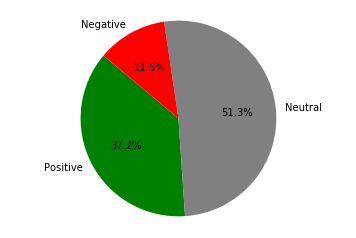

#Hellboy
Percentage of positive tweets: 62.5%
Percentage of neutral tweets: 29.6875%
Percentage de negative tweets: 7.8125%


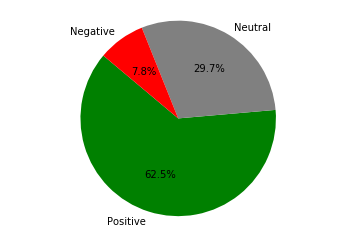

#Shazam!
Percentage of positive tweets: 70.11494252873563%
Percentage of neutral tweets: 20.689655172413794%
Percentage de negative tweets: 9.195402298850574%


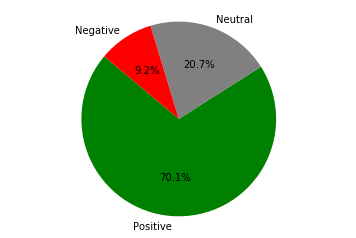

In [19]:
# For plotting and visualization
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def sentiment_plot_q(sen_q):
    print(sen_q)
    
    extractor = connectToTwitterAPI()
    # Specify search criteria
    tweets = extractor.search(q=sen_q, lang = "en", count=100)
    # Create a pandas dataframe
    data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
    # Compute sentiment for each tweet
    data['Sentiment'] = np.array([ analyseSentiment(tweet) for tweet in data['Tweets'] ])
    
    # Construct lists with classified tweets
    positiveTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
    neutralTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
    negativeTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]
    
    # Calculate percentages and avoid the situation without tweets
    try:
        positivePercent = len(positiveTweets)*100/len(data['Tweets'])
    except:
        positivePercent = len(positiveTweets)*100/0.001
    try:
        neutralPercent = len(neutralTweets)*100/len(data['Tweets'])
    except:
        neutralPercent = len(neutralTweets)*100/0.001
    try:
        negativePercent = len(negativeTweets)*100/len(data['Tweets'])
    except:
        negativePercent = len(negativeTweets)*100/0.001
    
    # Print percentages
    print("Percentage of positive tweets: {}%".format(positivePercent))
    print("Percentage of neutral tweets: {}%".format(neutralPercent))
    print("Percentage de negative tweets: {}%".format(negativePercent))
    
    labels = ['Positive', 'Neutral', 'Negative']
    sizes = [positivePercent, neutralPercent, negativePercent]
    # Set different colors
    colors = ['green', 'grey', 'red']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()
    
sentiment_plot_q("#Avengers: Endgame")
sentiment_plot_q("#Hellboy")
sentiment_plot_q("#Shazam!")

In this part, I extract the percentages of the positive aspects of each movie and save two decimal places for each data to make it easier to draw a bar chart later.

In [20]:
def positive_tweets(a):
    print(a)
    
    extractor = connectToTwitterAPI()
    tweets = extractor.search(q=a, lang = "en", count=100)
    data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
    data['Sentiment'] = np.array([ analyseSentiment(tweet) for tweet in data['Tweets'] ])
    
    positiveTweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
    positivePercent = len(positiveTweets)*100/len(data['Tweets'])
    print("Percentage of positive tweets: {}%".format(positivePercent))
    
    # Take two decimal places
    a = '%.2f%%' % positivePercent
    print("Take two decimal places:", a)
    print('\n')

positive_tweets("#Avengers: Endgame")
positive_tweets("#Hellboy")
positive_tweets("#Shazam!")

#Avengers: Endgame
Percentage of positive tweets: 37.17948717948718%
Take two decimal places: 37.18%


#Hellboy
Percentage of positive tweets: 62.5%
Take two decimal places: 62.50%


#Shazam!
Percentage of positive tweets: 70.11494252873563%
Take two decimal places: 70.11%




CONNECT these functions, and compare the popularity of different movies with a bar chart.

Text(0.5, 1.0, 'Most popular movies')

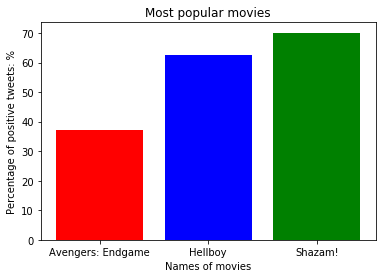

In [22]:
import matplotlib.pyplot as plt

# Setup the data
y = [37.18,62.50,70.11]
x = ['Avengers: Endgame','Hellboy','Shazam!']
colours = ['red','blue','green']

# Plot the data
plt.bar(x,y, color=colours)

# Lable the chart
plt.ylabel('Percentage of positive tweets: %')
plt.xlabel('Names of movies')
plt.title('Most popular movies')

Comparing the data from the IMDb website with the data scraped by Twitter API, I choose "Avengers: Endgame". Although there are few positive comments of "Avengers: Endgame" on Twitter, the movie ranks first in IMDb. In addition, Avengers: Endgame is very hot recently.

## Australian Population by AGE, STATES AND TERRITORIES

In [25]:
import pandas
import pandas as pd

file = "Age_percentage.csv"
Age_percentage = pandas.read_csv(file, index_col=0)
Age_percentage

,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
Age group (years),%,%,%,%,%,%,%,%,%
0–4,6.4,6.3,6.3,5.8,6.7,5.6,7.6,6.8,6.3
5–9,6.4,6.3,6.7,6.1,6.6,6.1,7.4,6.6,6.4
10–14,6.0,5.8,6.5,5.8,6.3,6.1,6.7,5.7,6.1
15–19,5.9,5.8,6.2,5.9,5.9,6.0,6.1,5.9,6.0
20–24,6.9,7.4,6.9,6.6,6.5,6.0,7.0,8.3,7.0
25–29,7.6,8.0,7.2,6.7,7.3,6.1,9.5,8.2,7.5
30–34,7.4,7.8,7.0,6.7,7.9,6.0,9.7,8.4,7.5
35–39,6.9,7.1,6.7,6.3,7.2,5.7,8.1,7.9,6.9
40–44,6.3,6.4,6.4,6.0,6.6,5.7,7.0,6.8,6.4


The percentage of people aged 15-24 in each state can be found on the Australian Population website( http://www.abs.gov.au/ausstats/abs@.nsf/0/1CD2B1952AFC5E7ACA257298000F2E76?OpenDocument ), but my company needs population data of 16-25 years old. So We scraped the population of each age group in each state to calculate the percentage of people aged 16-25.

In [26]:
Age_all = pandas.read_csv("Population_age_all.csv", index_col= "Age (years)")
pandas.set_option('display.max_rows', None) # Set the display maximum line
Age_all

,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
Age (years),,,,,,,,,
0,"105,254","78,645","61,865","18,925","33,875","5,514","3,798","5,652","313,569"
1,"98,027","78,988","61,897","19,447","34,643","5,707","3,722","5,620","308,080"
2,"102,609","84,523","64,211","20,973","35,618","6,190","3,890","5,776","323,844"
3,"100,561","82,670","64,475","20,416","34,680","6,062","3,654","5,837","318,404"
4,"100,753","81,782","65,346","20,663","34,360","6,124","3,607","5,620","318,319"
5,"102,524","83,418","66,442","21,024","34,751","6,196","3,672","5,781","323,859"
6,"102,069","81,350","66,496","21,262","34,174","6,212","3,795","5,697","321,117"
7,"101,628","80,163","67,173","20,869","34,723","6,465","3,669","5,514","320,261"
8,"101,793","80,578","68,201","21,135","34,343","6,438","3,643","5,549","321,743"


I re-created a new table by selecting 16-25 years old data from the table above.

In [27]:
Age_16_25 = pandas.read_csv("Population_age_16_25.csv", index_col= "Age (years)")
Age_16_25

,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
Age (years),,,,,,,,,
16,"90,026","70,980","61,843","19,751","30,024","6,246","3,073","4,385","286,382"
17,"92,750","73,303","63,276","20,451","30,734","6,377","3,053","4,644","294,627"
18,"97,101","78,505","63,415","21,246","31,148","6,458","2,955","5,217","306,088"
19,"101,513","83,605","63,630","22,004","32,110","6,515","2,906","6,032","318,362"
20,"103,260","86,917","64,758","22,258","31,960","6,179","3,097","6,566","325,039"
21,"104,617","90,577","66,114","22,509","32,578","6,195","3,189","6,764","332,584"
22,"108,021","95,374","68,522","23,247","33,446","6,296","3,294","6,928","345,156"
23,"115,729","102,561","71,942","23,965","34,747","6,611","3,769","7,278","366,643"
24,"118,246","103,540","72,634","23,442","34,953","6,497","3,936","7,316","370,615"


In [28]:
States = Age_all.columns
Age_all_cln = Age_all.filter(States, axis=1)
Age_all_population = Age_all_cln.loc["All ages"]
Age_all_population

New South Wales                  7,987,264
Victoria                         6,459,765
Queensland                       5,012,176
South Australia                  1,736,389
Western Australia                2,595,877
Tasmania                           528,097
Northern Territory                 247,281
Australian Capital Territory       420,902
Australia                       24,992,369
Name: All ages, dtype: object

In [29]:
States = Age_16_25.columns
Age_16_25_cln = Age_16_25.filter(States, axis=1)
Age_16_25_population = Age_16_25_cln.loc["Total"]
Age_16_25_population

New South Wales                 1,049,569
Victoria                          887,113
Queensland                        669,125
South Australia                   222,122
Western Australia                 327,743
Tasmania                           63,745
Northern Territory                 33,456
Australian Capital Territory       62,087
Australia                       3,315,402
Name: Total, dtype: object

The number of people aged 16-25 in each state divided by the total number of people in each state is 'the percentage of people aged 16-25 in each state'. So, the percentage of people aged 16-25 in New South Wales is 13.14%, in Victoria is 13.73%, in Queensland is 13.35%, in South Australia is 12.79%, in Western Australia is 12.63%, in Tasmania is 12.07%, in Northern Territory is 13.53%, in Australian Capital Territory is 14.75%.

After obtaining the percentage of people aged 16-25, I list these data in a table.

In [30]:
data ={'Age (16-25)':{'New South Wales':'1,049,569',
                     'Victoria':'887,113',
                     'Queensland':'669,125',
                     'South Australia':'222,122',
                     'Western Australia':'327,743',
                     'Tasmania':'63,745',
                     'Northern Territory':'33,456',
                     'Australian Capital Territory':'62,087'},
       'Age (all)':{'New South Wales':'7,987,264',
                   'Victoria':'6,459,765',
                   'Queensland':'5,012,176',
                   'South Australia':'1,736,389',
                   'Western Australia':'2,595,877',
                   'Tasmania':'528,097',
                   'Northern Territory':'247,281',
                   'Australian Capital Territory':'420,902'},
       'Persons - 16-25 years (%)':{'New South Wales':'13.14%',
                                    'Victoria':'13.73%',
                                    'Queensland':'13.35%',
                                    'South Australia':'12.79%',
                                    'Western Australia':'12.63%',
                                    'Tasmania':'12.07%',
                                    'Northern Territory':'13.53%',
                                    'Australian Capital Territory':'14.75%'}} 
df = pandas.DataFrame(data)
df

,Age (16-25),Age (all),Persons - 16-25 years (%)
Australian Capital Territory,"62,087","420,902",14.75%
New South Wales,"1,049,569","7,987,264",13.14%
Northern Territory,"33,456","247,281",13.53%
Queensland,"669,125","5,012,176",13.35%
South Australia,"222,122","1,736,389",12.79%
Tasmania,"63,745","528,097",12.07%
Victoria,"887,113","6,459,765",13.73%
Western Australia,"327,743","2,595,877",12.63%


### Analysis of the age groups in the different states in Australia

New South Wales has the largest population, 7,987,264. It also has the largest population of 16-25 years old, 1,049,569. So New South Wales is a Candidate area for the early test. However, as can be seen from the above table, the percentage of people aged 16-25 in Australian Capital Territory is the highest, which is 14.75%. So Australian Capital Territory is also a Candidate area.

After getting the percentage of people aged 16-25 in each state, I also need to know the population density of each state.

## Australia Population Density

In [31]:
State = pandas.read_csv("Density.csv", index_col=0, usecols=['State/Territory','persons/km2'])
State

,persons/km2
State/Territory,
New South Wales,9.7
Victoria,27.1
Queensland,2.8
South Australia,1.7
Western Australia,1.0
Tasmania,7.6
Northern Territory,0.2
Australian Capital Territory,170.9
Other Territories,18.0


Text(0, 0.5, 'persons/km2')

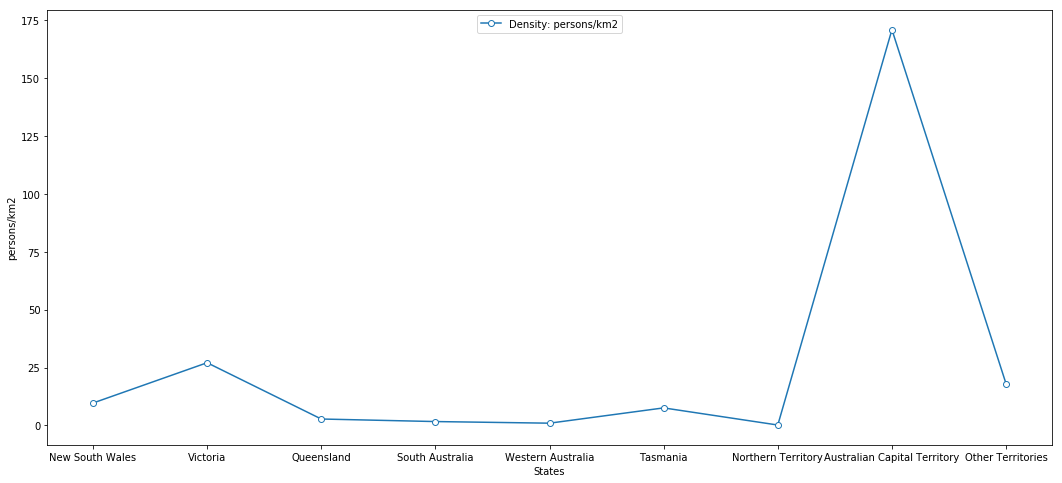

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
states = ['New South Wales', 'Victoria', 'Queensland', 'South Australia', 'Western Australia', 'Tasmania', 'Northern Territory', 'Australian Capital Territory', 'Other Territories']
density = [9.7,27.1,2.8,1.7,1.0,7.6,0.2,170.9,18.0]
plt.plot(states,density,marker='o',mfc='w',label="Density: persons/km2")

# Create legend.
plt.legend(loc='upper center')
plt.xlabel('States')
plt.ylabel('persons/km2')

### Analysis of the most density regions in Australia

The latest population density data for each state in Australia can be found on the website called Australia Population Density ( http://www.abs.gov.au/AUSSTATS/abs@.nsf/DetailsPage/3218.02016?OpenDocument ). As can be seen from the chart above, the most density region is Australian Capital Territory.

In addition, the percentage of people aged 16-25 in Australian Capital Territory is also the highest. So I will conduct the early test of the product at the Australian Capital Territory. Now all I need to do is to find the density of each area in Australian Capital Territory from the website called Australia Population Density, and then do the early test in the area with the highest population density.

In [34]:
Density_ACT = pandas.read_csv("Density_ACT.csv", index_col=0, usecols=["ASGS Code","Statistical Area Level 2 (SA2)","persons/km2"])
pandas.set_option('display.max_rows', None) # Set the display maximum line
Density_ACT

,Statistical Area Level 2 (SA2),persons/km2
ASGS Code,,
1001,Aranda,1565.5
1002,Belconnen,1523.5
1003,Bruce,1232.8
1004,Charnwood,1618.6
1005,Cook,1833.1
1006,Dunlop,2019.9
1007,Evatt,1753.4
1008,Florey,1775.8
1009,Flynn (ACT),1628.7


In [35]:
df = pandas.read_csv("Density_ACT.csv")
max_density = df["persons/km2"].max() # Find the maximum value of a column named "persons/km2"
print("The highest population density is: {} persons/km2".format(max_density))

The highest population density is: 4024.7 persons/km2


It can be seen that the highest population density is 4024.7 persons/km2, and by querying the table above, this area is Braddon. Finally, I want to choose Braddon from Australian Capital Territory as an early test area.

### SWOT (strengths, weaknesses, opportunities, and threats) Analysis
 * My company will use the images of "Avengers: Endgame" as the prints for Jackets.
 * My company will choose Braddon from Australian Capital Territory as an early test area.

Strengths:
  * Avengers: Endgame ranks first on IMDb, the most popular movie.
  * Avengers: Endgame has a lot of positive comments on IMDb.
  * Australian Capital Territory has the highest population density.
  * The percentage of people aged 16-25 in Australian Capital Territory is the highest.

Weaknesses:
  * There are not many positive comments on "Avenger: Ending" on Twitter.
  * Might be some minor problems with the movie that make it unpopular with some people.
  * Australian Capital Territory has a small population.
  * The population of Australian Capital Territory is much smaller than that of New South Wales. And so is the population aged 16-25.

Opportunities:
  * Avengers: Endgame is currently very hot.
  * Although the population of Australian Capital Territory is not as large as that of New South Wales, more concentrated population, it means that early testing is more convenient.
  * Save time and money of doing the early test.

Threats:
  * Few positive reviews of movies on Twitter may lead to low sales of jackets
  * Small population may result in the early test failing to achieve good results.